In [4]:
import nengo
import numpy as np
import matplotlib.pyplot as plt


In [5]:
t_on = 0.5     
u = 1.0         
T = 5          
seed = 1

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


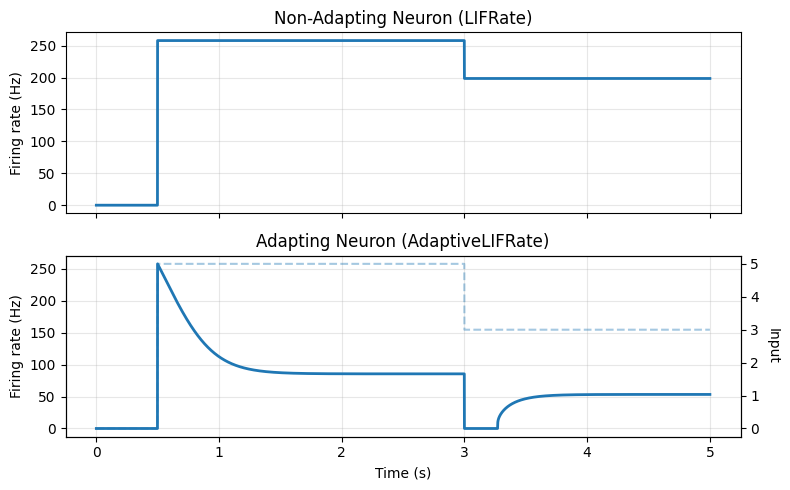

In [8]:
with nengo.Network(seed=seed) as model:
    stimulus = nengo.Node(lambda t: 0.0 if t < 0.5 else (5.0 if t < 3 else 3.0))

    nonadapt = nengo.Ensemble(
        n_neurons=1, dimensions=1,
        neuron_type=nengo.LIFRate(tau_rc=0.02, tau_ref=0.002),
        intercepts=[0.0], max_rates=[100.0], encoders=[[1.0]]
    )

    adapt = nengo.Ensemble(
        n_neurons=1, dimensions=1,
        neuron_type=nengo.AdaptiveLIFRate(
            tau_rc=0.02, tau_ref=0.002,
            tau_n=0.8,   
            inc_n=0.1    
        ),
        intercepts=[0.0], max_rates=[100.0], encoders=[[1.0]]
    )

    nengo.Connection(stimulus, nonadapt, synapse=None)
    nengo.Connection(stimulus, adapt, synapse=None)

    p_u = nengo.Probe(stimulus, synapse=None)
    p_non = nengo.Probe(nonadapt.neurons, synapse=None)
    p_adp = nengo.Probe(adapt.neurons, synapse=None)

with nengo.Simulator(model) as sim:
    sim.run(T)

t = sim.trange()

fig, axs = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
axs[0].plot(t, sim.data[p_non], lw=2)
axs[0].set_title("Non-Adapting Neuron (LIFRate)")
axs[0].set_ylabel("Firing rate (Hz)")
axs[0].grid(True, alpha=0.3)

axs[1].plot(t, sim.data[p_adp], lw=2)
axs[1].set_title("Adapting Neuron (AdaptiveLIFRate)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Firing rate (Hz)")
axs[1].grid(True, alpha=0.3)

ax2 = axs[1].twinx()
ax2.plot(t, sim.data[p_u], alpha=0.4, linestyle="--")
ax2.set_ylabel("Input", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()
